# Bank data analysis (Long term bank deposit)

The goal of your project is to create a robust classifier and use the data, with the help of which you will build a model that will recognize whether specific client will subscribe to a long term bank deposit (Binary classification).  
Make feature engineering but also try differnet models in order to get as much accuracy as possible.


1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

In [1]:
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('D:\DATA SCIENCE\Project\dataset.csv', sep=';', header=0)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Explanatory Data Analysis - EDA

## Univariate Analysis

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [61]:
# Output variable
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

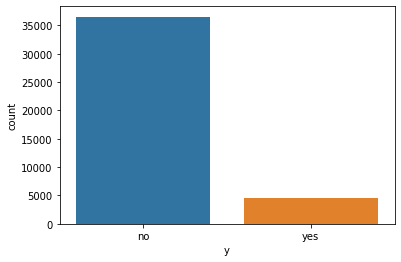

In [62]:
sns.countplot(df['y'])

Text(0.5, 1.0, 'Marital status')

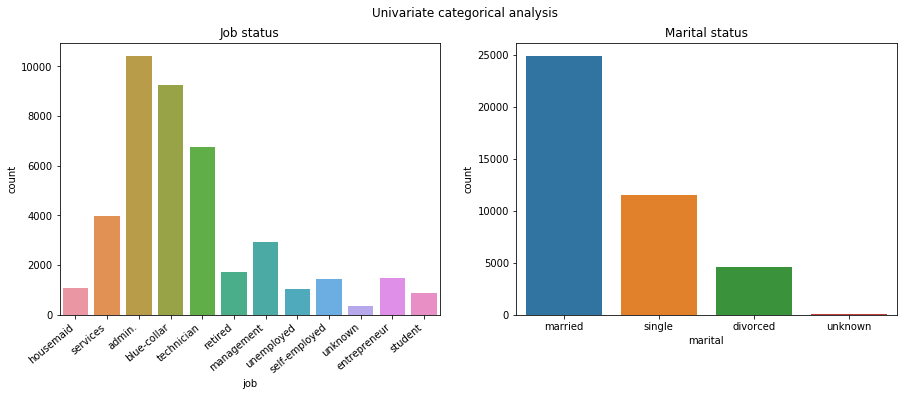

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')

ax = sns.countplot(ax = axes[0], x = df.job)
axes[0].set_title('Job status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.countplot(ax = axes[1], x = df.marital)
axes[1].set_title('Marital status')

Text(0.5, 1.0, 'Default status')

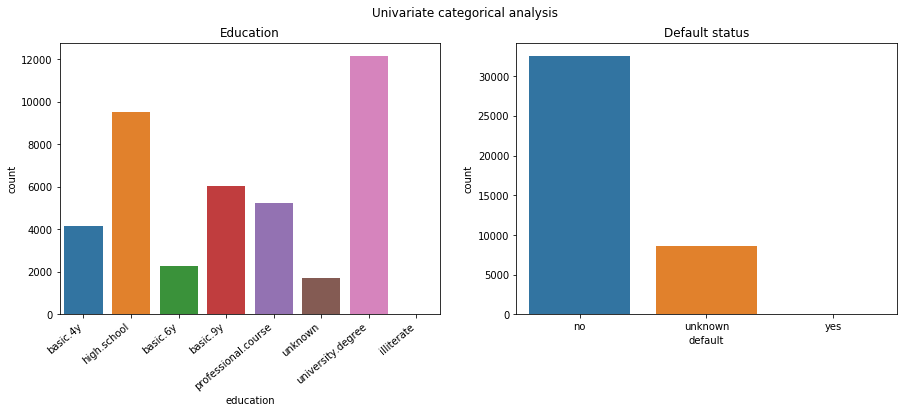

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')


ax = sns.countplot(ax = axes[0], x = df.education)
axes[0].set_title('Education')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(ax = axes[1], x = df.default)
axes[1].set_title('Default status')


Text(0.5, 1.0, 'Personal Loan')

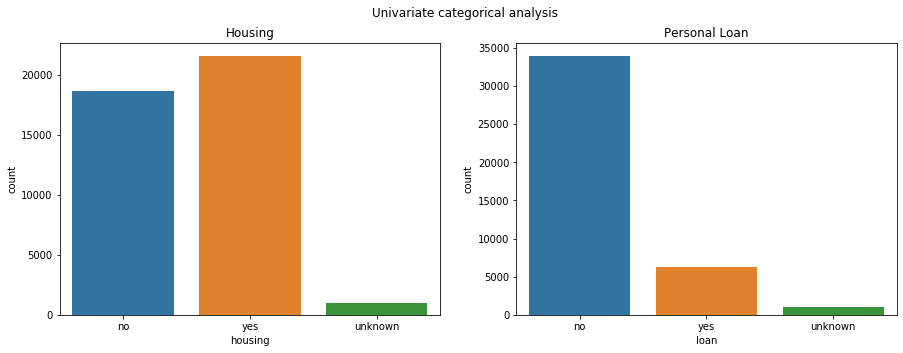

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')

ax = sns.countplot(ax = axes[0], x = df.housing)
axes[0].set_title('Housing')

sns.countplot(ax = axes[1], x = df.loan)
axes[1].set_title('Personal Loan')

Text(0.5, 1.0, 'Last contact day of the week')

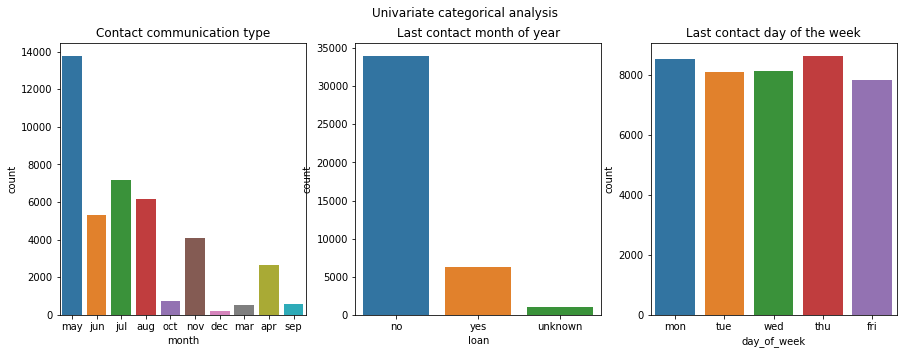

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Univariate categorical analysis')

ax = sns.countplot(ax = axes[0], x = df.month)
axes[0].set_title('Contact communication type')
sns.countplot(ax = axes[1], x = df.loan)
axes[1].set_title('Last contact month of year')
sns.countplot(ax = axes[2], x = df.day_of_week)
axes[2].set_title('Last contact day of the week')

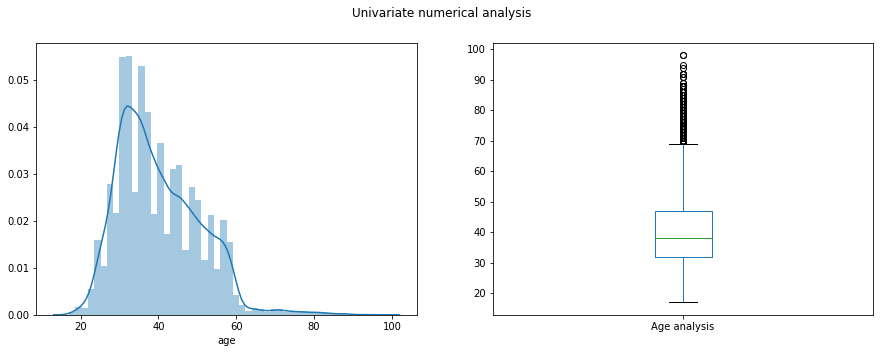

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate numerical analysis')

plt.subplot(121)
sns.distplot(df['age'], label='Age')

plt.subplot(122)
df['age'].plot(kind='box', label="Age analysis")

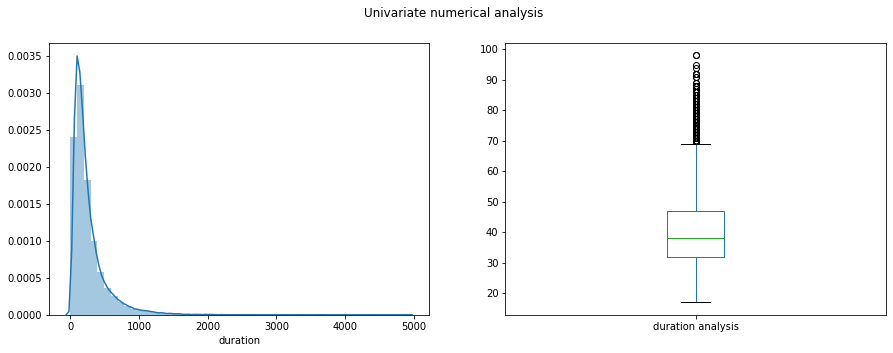

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Univariate numerical analysis')

plt.subplot(121)
sns.distplot(df['duration'], label='duration')

plt.subplot(122)
df['age'].plot(kind='box', label="duration analysis")

## Bivariate Analysis

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

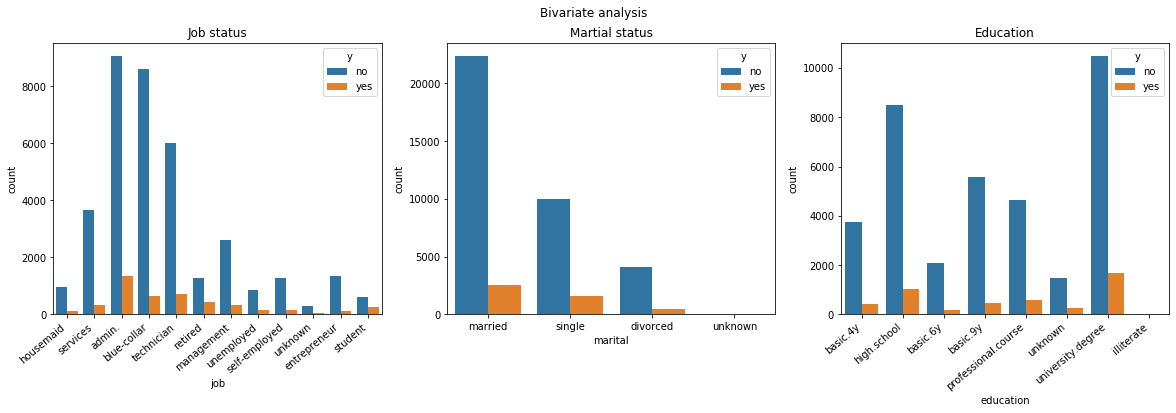

In [78]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Bivariate analysis')

ax1 = sns.countplot(ax = axes[0], x = df.job, hue='y', data = df)
axes[0].set_title('Job status')
axes[0].set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax2 = sns.countplot(ax = axes[1], x = df.marital, hue='y', data = df)
axes[1].set_title('Martial status')
ax3 = sns.countplot(ax = axes[2], x = df.education, hue='y', data = df)
axes[2].set_title('Education')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

Text(0.5, 1.0, 'Has personal loan?')

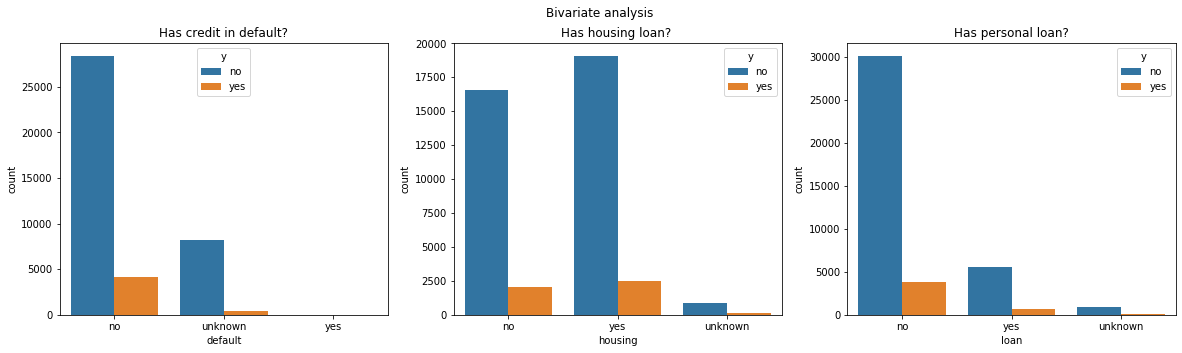

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Bivariate analysis')

ax1 = sns.countplot(ax = axes[0], x = df.default, hue='y', data = df)
axes[0].set_title('Has credit in default?')
ax2 = sns.countplot(ax = axes[1], x = df.housing, hue='y', data = df)
axes[1].set_title('Has housing loan? ')
ax3_3 = sns.countplot(ax = axes[2], x = df.loan, hue='y', data = df)
axes[2].set_title('Has personal loan?')


## 1. Data preprocessing, normalization, missing data, categorical data

In [80]:
for column in df.columns:
    if df[column].isnull().values.any():
        print(column)

In [83]:
#Normalization

from sklearn.preprocessing import RobustScaler

columns = ['age']
transformer = RobustScaler()

df[columns] = transformer.fit_transform(df[columns])


print("Mean = ", df['age'].mean())
print("Median = ", df['age'].median())
print("STD = ", df['age'].std())

Mean =  0.13493736039623264
Median =  0.0
STD =  0.6947499987289193


In [85]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
# Category encoding

cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']

In [ ]:
import category_encoders as ce



## 2. Feature Anaysis, Extraction & Selection
(you may need to perform feature selection after creating default models and compare to them)

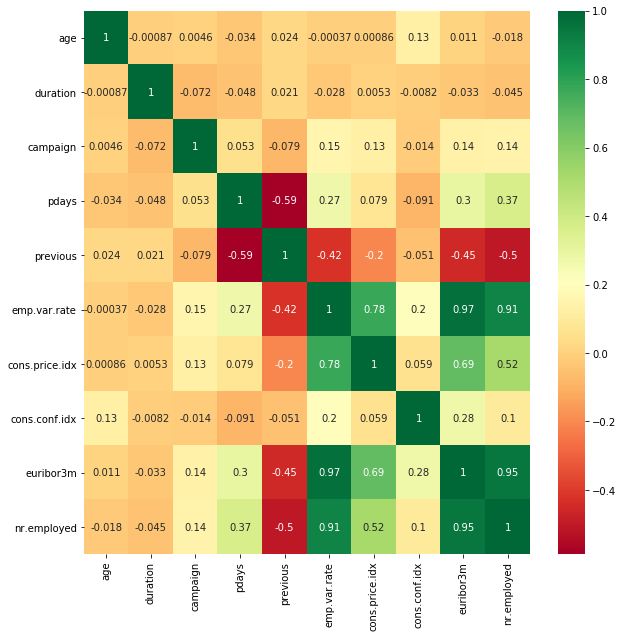

In [81]:
corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10,10))

g = sns.heatmap(df[top_corr_features].corr(), 
                annot=True,
                cmap='RdYlGn')

We can exclude those columns which are having absolute correlation greater than 0.95.

## 3. Classification models
- classical classification models
- deep neural networks

## 4. Evaluation and comparisons, various metrics

## 5. Hyperparameter Optimization

## 6. Final evaluations and comparisons
- the best model - analyze it in details, evaluate it with different train/test splits. Is it robust enough

## 7. Discussion, Concusions, Future improvements
- which features are the most important
- how will you explain the model to the management of the bank
- how much benefit/improvement should the bank expect